## Predicting Heart Disease Using Linear regression method.

**import the necessary library required for the project**

In [1]:
import numpy as num
import pandas as pan
import matplotlib.pyplot as mtplot
import bokeh as bkplot
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split #for spliting the data into training and testing set.
from sklearn.linear_model import LogisticRegression #i am going to use logisticregression model.
from sklearn.metrics import accuracy_score #use for evaluationg the model; to check how well it has performed.

Now the i have imported all the dependencies i need to perform the machine learning.
the next step is to collect and pre-process the data

## Data Collection

In [3]:
# Loading the data 
Heart = pan.read_csv('Hearts.csv')
Heart.head()

,Age,Anaemia,Creatinine_Phosphokinase,Diabetes,Ejection_Fraction,High_Blood_Pressure,Platelets,Serum_Creatinine,Serum_Sodium,Sex,Smoking,Time,Outcome
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
Heart.columns

Index(['Age', 'Anaemia', 'Creatinine_Phosphokinase', 'Diabetes',
       'Ejection_Fraction', 'High_Blood_Pressure', 'Platelets',
       'Serum_Creatinine', 'Serum_Sodium', 'Sex', 'Smoking', 'Time',
       'Outcome'],
      dtype='object')

<details><summary>Click to See the Detailed Description of the Features</summary>

1. `Anaemia` is a condition that develops when your blood produces a lower-than-normal amount of healthy red blood cells. If you have anemia, your body does not get enough oxygen-rich blood. The lack of oxygen can make you feel tired or weak. You may also have shortness of breath, dizziness, headaches, or an irregular heartbeat.

2. `Creatine` phosphokinase (CPK) is an enzyme in the body. It is found mainly in the heart, brain, and skeletal muscle. to know more <a href="https://www.ucsfhealth.org/medical-tests/creatine-phosphokinase-test">Click</a>

3.`Diabetes` symptoms depend on how high your blood sugar is.

4.`Ejection` fraction is a test your doctor can use to determine the percentage of blood that leaves a ventricle each time your heart beats, and to understand how well your heart works. to know more <a href="https://my.clevelandclinic.org/health/articles/16950-ejection-fraction">Click</a>

5. `High blood pressure` is a common condition that affects the body's arteries. It's also called hypertension. If you have high blood pressure, the force of the blood pushing against the artery walls is consistently too high. The heart has to work harder to pump blood. Blood pressure is measured in millimeters of mercury (mm Hg).

6. `Platelets` are the cells that circulate within our blood and bind together when they recognize damaged blood vessels,When you get a cut, for example, the platelets bind to the site of the damaged vessel, thereby causing a blood clot. There’s an evolutionary reason why they’re there. It’s to stop us from bleeding.
A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood. Having more than 450,000 platelets is a condition called thrombocytosis; having less than 150,000 is known as thrombocytopenia. You get your platelet number from a routine blood test called a complete blood count (CBC).read more <a href="https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important">Click</a>

7. `Creatinine` is a natural byproduct formed due to the breakdown of creatine. It is a waste product that is excreted out from the body on reaching the kidney,The optimum range of serum creatinine level in males ranges from 0.6 mg/dL to 1.2 mg/dL whereas in females the serum creatinine level lies between 0.5 mg/dL to 1.1 mg/dL.
The serum creatinine level greater than 4 mg/dL in the blood is a critical serum creatinine value.

8. `Sodium blood test` (also called a serum sodium test) is a way for your health care provider to measure the amount of sodium in your blood.If your sodium levels are too high for the amount of water in your body, it’s called hypernatremia. If the levels are too low, that’s called hyponatremia.
The normal blood sodium levels range from 135 to 145 mEq/L. If your result shows that you have a blood sodium level of less than 135 mEq/L, then you may be suffering from hyponatremia.
If your result shows that you have a blood sodium level of more than 145 mEq/L, then you may have hypernatremia.
</details>

**Exploring the Dataset**

In [5]:
# Number of rows and columns
Heart.shape

(299, 13)

In [6]:
#More information
Heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       299 non-null    float64
 1   Anaemia                   299 non-null    int64  
 2   Creatinine_Phosphokinase  299 non-null    int64  
 3   Diabetes                  299 non-null    int64  
 4   Ejection_Fraction         299 non-null    int64  
 5   High_Blood_Pressure       299 non-null    int64  
 6   Platelets                 299 non-null    float64
 7   Serum_Creatinine          299 non-null    float64
 8   Serum_Sodium              299 non-null    int64  
 9   Sex                       299 non-null    int64  
 10  Smoking                   299 non-null    int64  
 11  Time                      299 non-null    int64  
 12  Outcome                   299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
#statistical summary of the dataset
Heart.describe()

,Age,Anaemia,Creatinine_Phosphokinase,Diabetes,Ejection_Fraction,High_Blood_Pressure,Platelets,Serum_Creatinine,Serum_Sodium,Sex,Smoking,Time,Outcome
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Data Cleaning 

Finding Missingvalues/Duplicates and Dealing with it, there are various ways of dealing with missing values 1: Inputation(I: fillna(x) II: fillna(s.mean) or (mode)) 2: Removal/Deletting  

In [8]:
#missing Value
Heart.isnull().sum()

Age                         0
Anaemia                     0
Creatinine_Phosphokinase    0
Diabetes                    0
Ejection_Fraction           0
High_Blood_Pressure         0
Platelets                   0
Serum_Creatinine            0
Serum_Sodium                0
Sex                         0
Smoking                     0
Time                        0
Outcome                     0
dtype: int64

In [9]:
#Duplicated value
Heart.duplicated().any()

False

Everything looks good.

In [10]:
# Lets see the destribution of the target variable (Outcome)
# From this result we will see that 203 patients has HeartDisease and 96 don't have.

Heart['Outcome'].value_counts()

0    203
1     96
Name: Outcome, dtype: int64

the reason for getting this destribution is that: the number of patients with HeartDisease and those without
should'nt be so much different so that the result will not be bias, 1=203 and 0=96 is okay though.
where 1 == Unhealthy Heart,
      0 == Healthy Heart.

## Data Visualization; univariate analysis and to see correlations between variables

<AxesSubplot: xlabel='Anaemia', ylabel='count'>

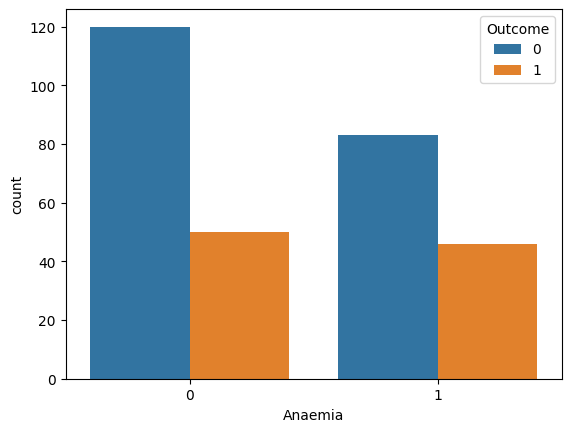

In [11]:
#Now lets see the correlation between Anaemia and Outcome
sns.countplot(x='Anaemia', hue='Outcome',data=Heart)

<AxesSubplot: xlabel='Diabetes', ylabel='count'>

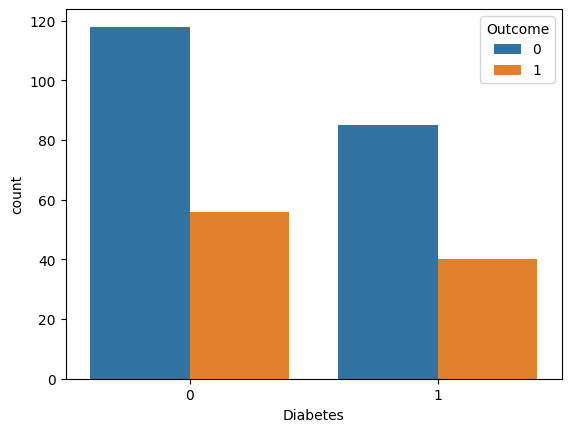

In [12]:
#Now lets see the correlation between Diabetes and Outcome
sns.countplot(x='Diabetes', hue='Outcome',data=Heart)

<AxesSubplot: xlabel='High_Blood_Pressure', ylabel='count'>

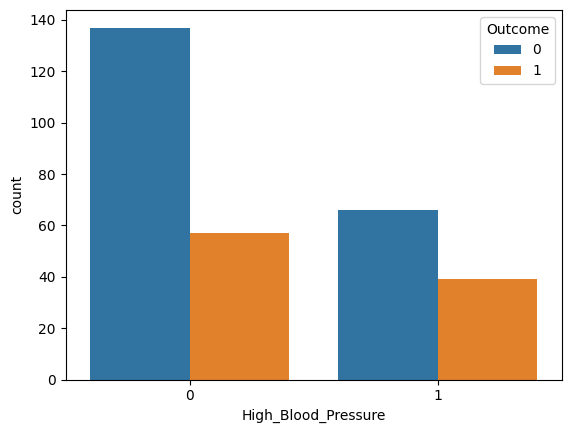

In [13]:
#Now lets see the correlation between High_Blood_Pressure and Outcome
sns.countplot(x='High_Blood_Pressure', hue='Outcome',data=Heart)

## spliting Features(X) and Target(Y) from Dataset

Splitting the data into features(X) and Target(Y): the Target is the Outcome while the Features are the means to the Outcome(all columns except the Target)

In [14]:
X = Heart.drop(columns = 'Outcome', axis=1)
Y = Heart['Outcome']

In [15]:
X.head()

,Age,Anaemia,Creatinine_Phosphokinase,Diabetes,Ejection_Fraction,High_Blood_Pressure,Platelets,Serum_Creatinine,Serum_Sodium,Sex,Smoking,Time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [16]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Outcome, dtype: int64

## Splitting data into Train and Test data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, stratify=Y, random_state=2)

---#Test_size mean the exact percentage of the data i want to use as the testing data. 
0.4 means i want to use 40% as test data it could be 0.2(20%) or 0.3(30%)
#Stratify=Y means that i want to split the outcome evenly to avoid having a bias model
#random=2 means to randomly select 

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(299, 12) (179, 12) (120, 12)


## Model Training

 I will be using Logistic Regression which is best for performing Binary Classification

In [19]:
model = LogisticRegression()

In [20]:
#Training the Logistic Regression model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation

In [21]:
#Accuracy of the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
Accuracytraining = training_data_accuracy
Accuracytraining

0.8324022346368715

this model for training is 83% accurate

In [22]:
#Accuracy of the testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
Accuracytesting = testing_data_accuracy
Accuracytesting

0.8333333333333334

this model for testing data is 83% accurate

# Now lets do Prediction 

In [23]:
input_data = (80,1,123,0,35,1,388000,9.4,133,1,1,10)

#Now i need to change the data(input_data) from tuple to numpy array; so that it can be mutable

input_data_numpy_array = num.asarray(input_data)

#now I reshape

input_data_reshape = input_data_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
#now predict

prediction

if(prediction[0]==0):
    print('The Patient dont have HeartDisease')
else:
    print('The Patient has HeartDisease')

The Patient has HeartDisease


/home/oem/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
